1000


<function matplotlib.pyplot.show(close=None, block=None)>

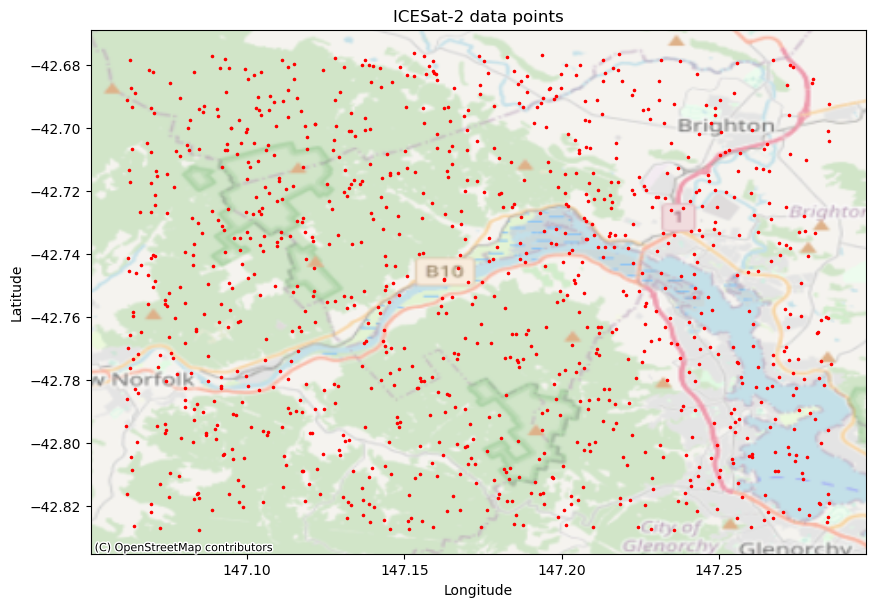

In [19]:
import contextily as cx
import matplotlib.pyplot as plt
from shapely.geometry import box
import geopandas as gpd
import pandas as pd
import seaborn as sns
from pyproj import CRS, Transformer
from shapely.geometry import Point
from shapely.ops import transform

#----------------------
fname = '../ICESAT/tasmania/tasman_samples4.csv'
clip = pd.read_csv(fname)

# print(clip['lat'].min(), clip['lon'].min()) 
# print(clip['lat'].max(), clip['lon'].max())
# -42.82772649201125 147.06156125629113
# -42.67634445638803 147.2853952809889

lat_min, lon_min = -42.82772649201125, 147.06156125629113
lat_max, lon_max = -42.67634445638803, 147.2853952809889
bbox = box(lon_min, lat_min, lon_max, lat_max)

# pts_3d = np.column_stack((x_pts, y_pts, icepts['h_te_interp']))

clip2 = clip[(clip['lat'] >= lat_min) & (clip['lat'] <= lat_max) & (clip['lon'] >= lon_min) & (clip['lon'] <= lon_max)]
print(len(clip2))

# @@@@@@@@@@@
# Plot Points
# @@@@@@@@@@@
# Create a Shapely polygon from the bounds
geo_points = gpd.GeoDataFrame(clip2, geometry=gpd.points_from_xy(clip2['lon'], clip2['lat']), crs="EPSG:4326")


fig, ax = plt.subplots(figsize=(10,10))
geo_points.plot(ax=ax, marker='.', c='red', markersize=10, alpha=1)
cx.add_basemap(ax, crs='epsg:4326', source=cx.providers.OpenStreetMap.Mapnik, zoom=11, alpha=0.7, reset_extent=True)
plt.title('ICESat-2 data points')
plt.ylabel('Latitude')
plt.xlabel('Longitude')
plt.show

# @@@@@@@@@@@
# Plot BBOX
# @@@@@@@@@@@
# trans = Transformer.from_crs("EPSG:4326", "EPSG:28992", always_xy=True).transform
# bbox = transform(trans, bbox)
# geo_bbox = gpd.GeoDataFrame(geometry=[bbox], crs="EPSG:4326")

# # Create a plot with Contextily
# ax = geo_bbox.plot(edgecolor="red", 
#                    facecolor="none",
#                    linewidth=1)
# cx.add_basemap(ax, crs='EPSG:4326', source=cx.providers.OpenStreetMap.Mapnik, zoom=10, reset_extent=True)

# plt.title("South Limburg Region")
# plt.xlabel("Longitude")
# plt.ylabel("Latitude")
# plt.show()

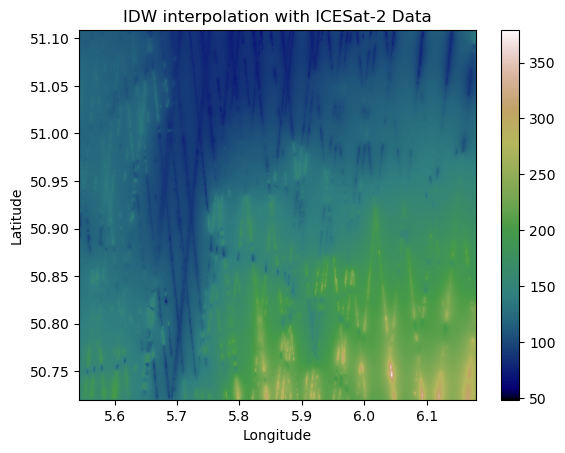

In [3]:
import rasterio
from rasterio.plot import show
import matplotlib.pyplot as plt
import xarray as xr
import rioxarray
import pandas as pd
import numpy as np

# predh = "/Users/leokan/Documents/TUDelft/icesatt/results/nz_new_plymouth_pred.tif"
# assess= "/Users/leokan/Documents/TUDelft/icesatt/results/assessment/newplymouth2-nzdem.tif"
# groundT = "/Users/leokan/Documents/TUDelft/icesatt/ground_truth/terenaki_hills_dem_res30_groundR.tif"
fname = '../ICESAT/tasmania/tasmania.csv'

clip = pd.read_csv(fname)

tin_h = "/Users/leokan/Desktop/idw_h1_m.tif"
tin = rioxarray.open_rasterio(tin_h, masked=True)
tin = tin.where(tin != -9999, np.nan)

# ast.squeeze().plot.imshow(vmin=-100, vmax=2000)
# np = assesst.values.flatten()
# pdas = pd.DataFrame(np)
# pdas.describe()
cl = clip[['lat', 'lon']]

# cl.plot(kind='scatter', x='lon', y='lat', s=0.01, c='mediumblue', alpha=0.3, zorder=10)
tin.plot(cmap='gist_earth', zorder=0)

plt.title('IDW interpolation with ICESat-2 Data')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
# plt.rcParams['figure.figsize'] = [10, 6]
# plt.tight_layout()
plt.show()

In [5]:
import rasterio
from rasterio.plot import show
import matplotlib.pyplot as plt
import xarray as xr
import rioxarray
import pandas as pd
import seaborn as sns

ground_truth = "/Users/leokan/Documents/TUDelft/icesatt/results/nz_new_plymouth_pred.tif"
predh = "/Users/leokan/Documents/TUDelft/icesatt/results/nz_new_plymouth_pred.tif"
diff= "/Users/leokan/Documents/TUDelft/icesatt/results/assessment/newplymouth2-nzdem.tif"
groundT = "/Users/leokan/Documents/TUDelft/icesatt/ground_truth/terenaki_hills_dem_res30_groundR.tif"


predh_ = rioxarray.open_rasterio(diff)
predh_ = predh_.values.flatten()
predh_pd = pd.DataFrame(predh_)
predh_pd.describe()

# diff = rioxarray.open_rasterio(assess)
# diff_ = assess.values.flatten()
# pdstats = pd.DataFrame(diff_)
# print(pdstats.mean())

# sns.set()
# sns.displot(data=assess_stats)
# plt.title('Height difference of RF Terrain from Ground Truth')
# plt.xlabel('Difference in Height (m)')
# plt.ylabel('Frequency')
# plt.plot()


,0
count,3.566301e+06
mean,2.161243e+01
std,8.283186e+00
min,-1.497237e+02
25%,1.879450e+01
50%,2.133183e+01
75%,2.394057e+01
max,2.144472e+02


Text(0.5, 1.0, 'RF Terrain Prediction')

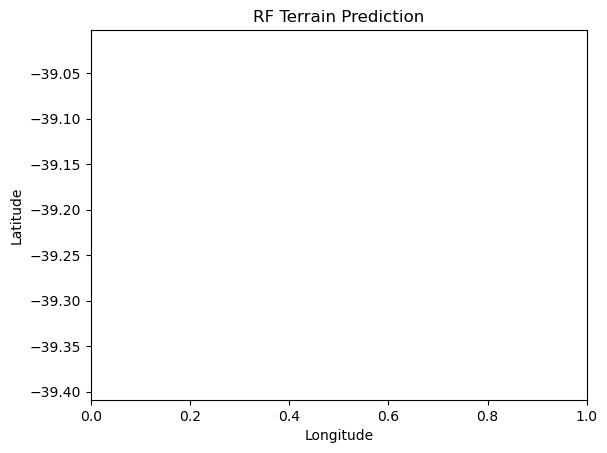

In [6]:
import rasterio
import matplotlib.pyplot as plt
import numpy as np
from rasterio.plot import show
from rasterio.transform import from_origin

file_path = "/Users/leokan/Documents/TUDelft/icesatt/results/nz_new_plymouth_pred.tif"

dataset = rasterio.open(file_path)
raster_data = dataset.read()

transform = dataset.transform
left, bottom, right, top = dataset.bounds
num_bands, height, width = raster_data.shape

fig, ax = plt.subplots()
# rf_image = show(raster_data, ax=ax, transform=transform, cmap='terrain')
# cbar = fig.colorbar(rf_image, ax=ax, cmap='terrain')
# plt.axis('off')
# plt.show()

# # Reverse the y-axis (latitude)
ax.set_ylim(top, bottom)
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title('RF Terrain Prediction')

# fig.colorbar(rf_image, ax=ax)

# fig.colorbar(rf_image, ax=ax, orientation='vertical')

# cbar.set_label('Colorbar Label')

# plt.show()
